# Analyzing TMDb Data for Mood-Based Film Suggestions

In this notebook, we will explore a comprehensive dataset of movies sourced from The Movie Database (TMDb). We will analyze various features such as genres, directors, user ratings, and more to provide personalized movie recommendations.

Step 2: Import Necessary Libraries
Code Cell:
This is where you import the necessary libraries. Run this cell to ensure all required libraries are available.

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Future Warnings: Add this line if you want to suppress future warnings related to Seaborn or other libraries.

If you see warnings like: 
FutureWarning: use_inf_as_na option is deprecated...

In [67]:
import warnings
warnings.filterwarnings("ignore")

Step 3: Verify File Paths
Code Cell:
Create a code cell to list all files in the input directory. This will help confirm the paths of your datasets.

In [68]:
# List all files in the input directory to confirm paths
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/which-movie-should-i-watch-today/Movies.csv
/kaggle/input/which-movie-should-i-watch-today/PosterPath.csv
/kaggle/input/which-movie-should-i-watch-today/MoreInfo.csv
/kaggle/input/which-movie-should-i-watch-today/FilmDetails.csv


Step 4: Load Datasets
Code Cell:
Now create a code cell to load the datasets using the confirmed paths from the previous step. If you see any discrepancies in file names or paths from the output, update them here.

In [69]:
# Load datasets with confirmed paths
movies_df = pd.read_csv('/kaggle/input/which-movie-should-i-watch-today/Movies.csv')
film_details_df = pd.read_csv('/kaggle/input/which-movie-should-i-watch-today/FilmDetails.csv')
more_info_df = pd.read_csv('/kaggle/input/which-movie-should-i-watch-today/MoreInfo.csv')
poster_path_df = pd.read_csv('/kaggle/input/which-movie-should-i-watch-today/PosterPath.csv')

Step 5: Display First Few Rows of Each DataFrame
Code Cell:
Create another code cell to display the first few rows of each dataframe. Run this cell after successfully loading the datasets.

In [70]:
# Display first few rows of each dataframe to verify successful loading
print("Movies DataFrame:")
display(movies_df.head())

print("Film Details DataFrame:")
display(film_details_df.head())

print("More Info DataFrame:")
display(more_info_df.head())

print("Poster Path DataFrame:")
display(poster_path_df.head())

Movies DataFrame:


,id,title,genres,language,user_score,runtime_hour,runtime_min,release_date,vote_count
0,1,The Shawshank Redemption,"Drama, Crime",en,8.7,2,22,1994-09-23,27070
1,2,The Godfather,"Drama, Crime",en,8.7,2,55,1972-03-14,20563
2,3,The Godfather Part II,"Drama, Crime",en,8.6,3,22,1974-12-20,12403
3,4,Schindler's List,"Drama, History, War",en,8.6,3,15,1993-12-15,15810
4,5,12 Angry Men,Drama,en,8.5,1,37,1957-04-10,8611


Film Details DataFrame:


,id,director,top_billed,budget_usd,revenue_usd
0,1,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",25000000.0,28341469.0
1,2,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Robert D...",6000000.0,245066411.0
2,3,Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",13000000.0,102600000.0
3,4,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",22000000.0,321365567.0
4,5,Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",397751.0,4360000.0


More Info DataFrame:


,id,runtime,budget,revenue,film_id
0,1,2h 22 min,"$25,000,000","$28,341,469",1
1,2,2h 55 min,"$6,000,000","$245,066,411",2
2,3,3h 22 min,"$13,000,000","$102,600,000",3
3,4,3h 15 min,"$22,000,000","$321,365,567",4
4,5,1h 37 min,"$397,751","$4,360,000",5


Poster Path DataFrame:


,id,poster_path,backdrop_path
0,1,https://image.tmdb.org/t/p/w500/9cqNxx0GxF0bfl...,https://image.tmdb.org/t/p/w500/zfbjgQE1uSd9wi...
1,2,https://image.tmdb.org/t/p/w500/3bhkrj58Vtu7en...,https://image.tmdb.org/t/p/w500/tmU7GeKVybMWFB...
2,3,https://image.tmdb.org/t/p/w500/hek3koDUyRQk7F...,https://image.tmdb.org/t/p/w500/kGzFbGhp99zva6...
3,4,https://image.tmdb.org/t/p/w500/sF1U4EUQS8YHUY...,https://image.tmdb.org/t/p/w500/zb6fM1CX41D9rF...
4,5,https://image.tmdb.org/t/p/w500/ow3wq89wM8qd5X...,https://image.tmdb.org/t/p/w500/qqHQsStV6exghC...


4. Data Exploration and Cleaning

In [71]:
# Check for missing values in each dataframe
print("Missing values in Movies DataFrame:")
print(movies_df.isnull().sum())

print("Missing values in Film Details DataFrame:")
print(film_details_df.isnull().sum())

print("Missing values in More Info DataFrame:")
print(more_info_df.isnull().sum())

print("Missing values in Poster Path DataFrame:")
print(poster_path_df.isnull().sum())

# Convert 'release_date' to datetime format
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

# Check for missing values after conversion
print("Missing values in release_date after conversion:")
print(movies_df['release_date'].isnull().sum())

Missing values in Movies DataFrame:
id              0
title           0
genres          0
language        0
user_score      0
runtime_hour    0
runtime_min     0
release_date    0
vote_count      0
dtype: int64
Missing values in Film Details DataFrame:
id                0
director          0
top_billed       17
budget_usd     2981
revenue_usd    2541
dtype: int64
Missing values in More Info DataFrame:
id            0
runtime       0
budget     2982
revenue    2541
film_id       0
dtype: int64
Missing values in Poster Path DataFrame:
id               0
poster_path      0
backdrop_path    0
dtype: int64
Missing values in release_date after conversion:
0


**Now! Let's play with the data.**

## Visualization 1: Distribution of User Scores

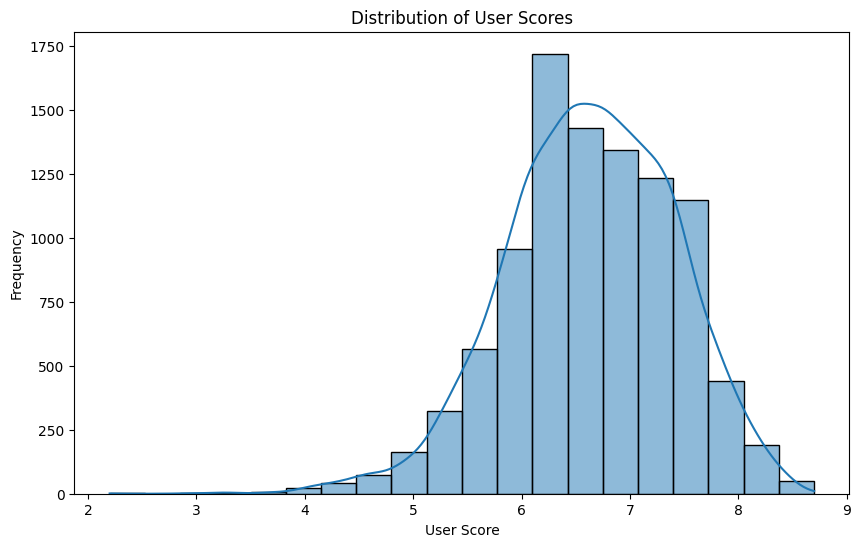

In [72]:
# Visualization 1: Distribution of User Scores
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['user_score'], bins=20, kde=True)
plt.title('Distribution of User Scores')
plt.xlabel('User Score')
plt.ylabel('Frequency')
plt.show()

## Visualization 2: Top 10 Movie Genres

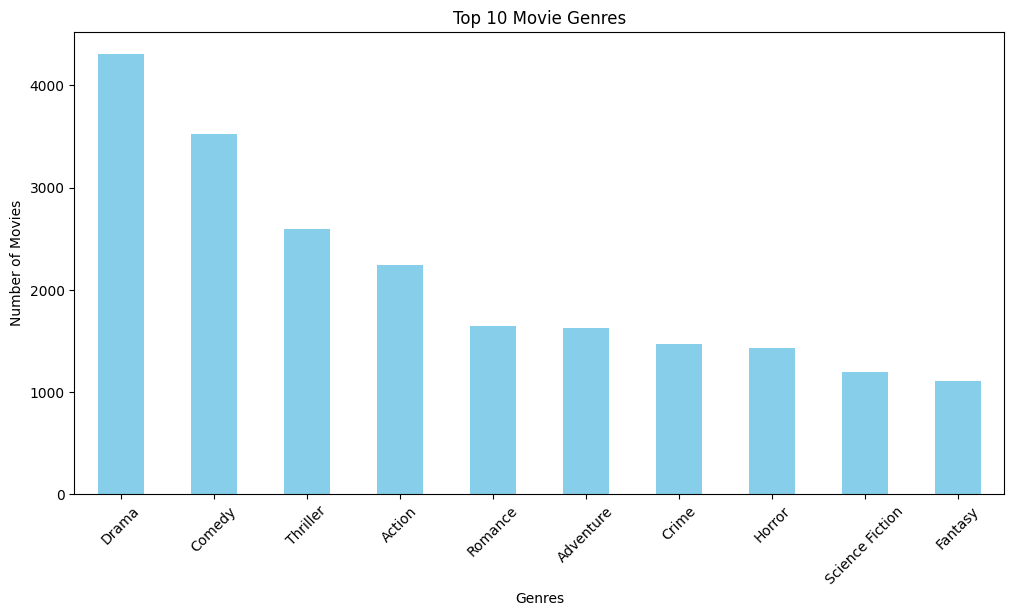

In [73]:
# Visualization 2: Top 10 Movie Genres
genre_counts = movies_df['genres'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
genre_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

## Visualization 3: User Score vs. Release Year

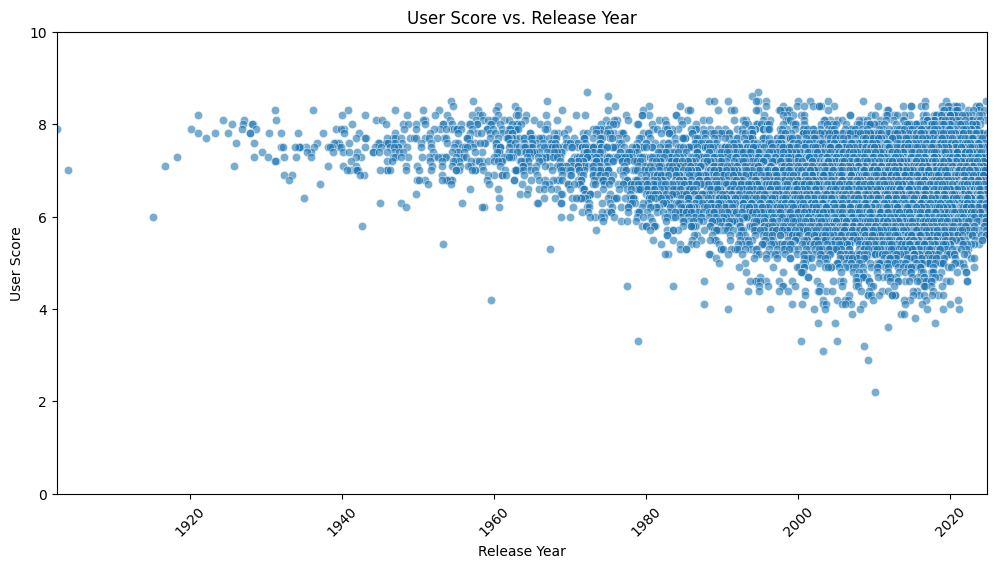

In [74]:
# Visualization 3: User Score vs. Release Year
plt.figure(figsize=(12, 6))
sns.scatterplot(data=movies_df, x='release_date', y='user_score', alpha=0.6)
plt.title('User Score vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('User Score')
plt.xticks(rotation=45)
plt.xlim(movies_df['release_date'].min(), movies_df['release_date'].max())  # Set x-axis limits based on data range
plt.ylim(0, 10)  # Assuming user scores range from 0 to 10
plt.show()

## Visualization 4: Pie Chart of Movie Distribution by Language
Description: A pie chart can show the distribution of movies by language, providing insights into the diversity of languages in your dataset.

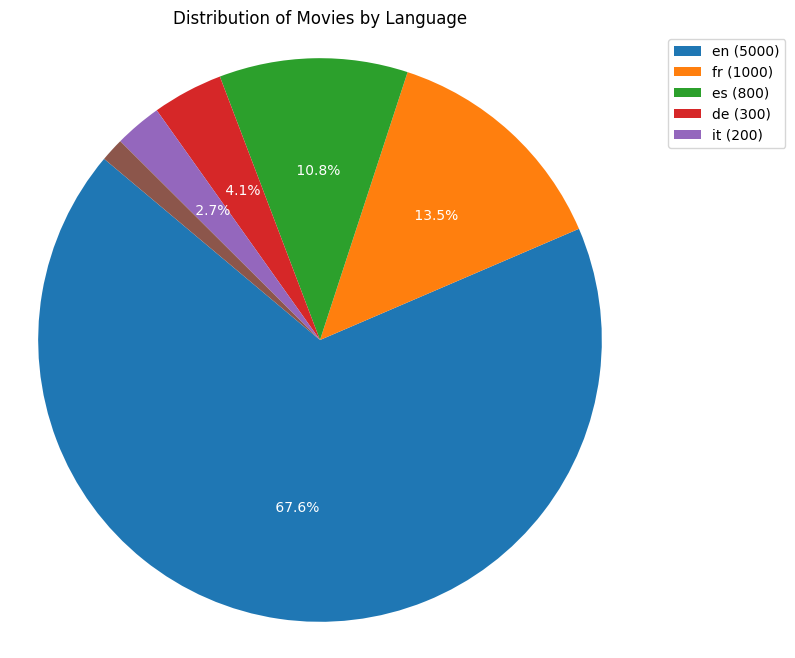

In [79]:
import matplotlib.pyplot as plt

# Assuming language_counts is a pandas Series with language as index and counts as values
# Example: language_counts = pd.Series({'en': 5000, 'fr': 1000, 'es': 800, ...})

def autopct_with_filter(pct, allvalues):
    """
    Custom function for autopct that formats percentages and adds language labels.
    Only shows labels for slices above a certain threshold.
    """
    if pct < 1.8:  # Adjust threshold as needed
        return ''  # Empty string to hide the label
    else:
        # Find the index of the percentage in allvalues to get the corresponding language
        idx = int(round(pct / 100 * sum(allvalues)))  # Calculate the index based on percentage
        language_label = language_counts.index[idx] if idx < len(language_counts) else ''
        return f'{language_label} {pct:.1f}%'  # Display language short form and percentage

plt.figure(figsize=(8, 8))
# Prepare data for pie chart
sizes = language_counts.values
labels = language_counts.index

# Create pie chart
wedges, texts, autotexts = plt.pie(sizes, labels=None, autopct=lambda pct: autopct_with_filter(pct, sizes), 
                                    startangle=140, radius=0.7)

plt.title('Distribution of Movies by Language')
plt.axis('equal')

# Customize text properties for better readability
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_color('white')  # Change color of percentages inside pie
    autotext.set_fontsize(10)     # Font size for percentages

# Add a legend outside the pie chart for languages above threshold
plt.legend([f"{lang} ({count})" for lang, count in zip(labels, sizes) if (count / sum(sizes)) * 100 > 1.8],
           loc='upper left', bbox_to_anchor=(1.05, 1))

plt.show()

## Recommendation Functionality

In [76]:
def recommend_movies(genre=None, min_score=0):
    filtered_movies = movies_df[(movies_df['user_score'] >= min_score)]
    if genre:
        filtered_movies = filtered_movies[filtered_movies['genres'].str.contains(genre)]
    return filtered_movies[['title', 'user_score', 'release_date']].head(10)

# Example usage:
print("Recommended Movies: Drama")
display(recommend_movies(genre='Drama', min_score=8))

Recommended Movies: Drama


,title,user_score,release_date
0,The Shawshank Redemption,8.7,1994-09-23
1,The Godfather,8.7,1972-03-14
2,The Godfather Part II,8.6,1974-12-20
3,Schindler's List,8.6,1993-12-15
4,12 Angry Men,8.5,1957-04-10
7,Dilwale Dulhania Le Jayenge,8.5,1995-10-20
8,The Dark Knight,8.5,2008-07-16
9,The Green Mile,8.5,1999-12-10
10,Parasite,8.5,2019-05-30
12,Your Name.,8.5,2016-08-26


In [77]:
def recommend_movies(genre=None, min_score=0):
    filtered_movies = movies_df[(movies_df['user_score'] >= min_score)]
    if genre:
        filtered_movies = filtered_movies[filtered_movies['genres'].str.contains(genre)]
    return filtered_movies[['title', 'user_score', 'release_date']].head(10)

# Example usage:
print("Recommended Movies: Horror")
display(recommend_movies(genre='Horror', min_score=8))

Recommended Movies: Horror


,title,user_score,release_date
24,Psycho,8.4,1960-06-22
109,The Shining,8.2,1980-05-23
129,Michael Jackson's Thriller,8.2,1983-11-14
151,Alien,8.2,1979-05-25
236,The Thing,8.1,1982-06-25


## Conclusion

In this notebook, I explored a dataset of movies from TMDb and provided insights into various features such as user scores and genres. Users can utilize the recommendation function to find movies that match their preferences. Feel free to modify this notebook to explore different aspects of the dataset!